In [16]:
!pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce


In [56]:
df = pd.read_excel('adult.xlsx',header=None)

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-Num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours-per-week', 'Native Country',
       'Income'],
      dtype='object')


# data cleaning

In [57]:
print(df.shape)
df.head()

(32561, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [58]:
df.columns = [
    "Age",
    "Workclass",
    "Fnlwgt",
    "Education",
    "Education-Num",
    "Marital Status",
    "Occupation",
    "Relationship",
    "Race",
    "Sex",
    "Capital Gain",
    "Capital Loss",
    "Hours-per-week",
    "Native Country",
    "Income"
]

print(df.shape)
df.head()

(32561, 15)


,Age,Workclass,Fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours-per-week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Remove not needed columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [59]:
df.Workclass.unique()
cols =['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native Country','Income']

for i in cols:
  print(df[i].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' 

In [27]:
df['Workclass'].replace('?', np.NaN, inplace=True)
df['Occupation'].replace('?', np.NaN, inplace=True)
df['Native Country'].replace('?', np.NaN, inplace=True)


In [28]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)


There are 9 categorical variables

The categorical variables are :

 ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native Country', 'Income']


In [29]:
X = df.drop(['Income'], axis=1)

y = df['Income']


In [32]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']
numerical = [col for col in df.columns if df[col].dtypes != 'O']


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [34]:
X_train.shape, X_test.shape


((22792, 14), (9769, 14))

In [36]:
for df in [X_train, X_test]:
    df['Workclass'].fillna(X_train['Workclass'].mode()[0], inplace=True)
    df['Occupation'].fillna(X_train['Occupation'].mode()[0], inplace=True)
    df['Native Country'].fillna(X_train['Native Country'].mode()[0], inplace=True)


In [37]:
encoder = ce.OneHotEncoder(cols =['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native Country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


In [43]:
X_train.head()


,Age,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,Workclass_9,...,Native Country_33,Native Country_34,Native Country_35,Native Country_36,Native Country_37,Native Country_38,Native Country_39,Native Country_40,Native Country_41,Native Country_42
32098,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()


,Age,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,Workclass_9,...,Native Country_33,Native Country_34,Native Country_35,Native Country_36,Native Country_37,Native Country_38,Native Country_39,Native Country_40,Native Country_41,Native Country_42
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)


GaussianNB()

In [46]:
y_pred = gnb.predict(X_test)

y_pred


array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.7973


In [48]:
y_pred_train = gnb.predict(X_train)

y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.8000


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       <=50K       0.93      0.79      0.86      7407
        >50K       0.56      0.81      0.66      2362

    accuracy                           0.80      9769
   macro avg       0.74      0.80      0.76      9769
weighted avg       0.84      0.80      0.81      9769



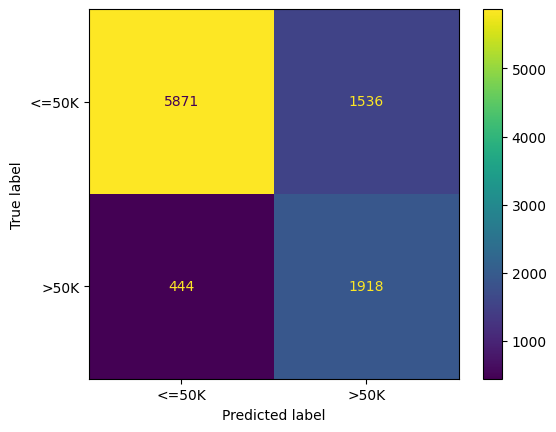

In [61]:
from sklearn.metrics import confusion_matrix

y_predicted = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)


from sklearn.metrics import ConfusionMatrixDisplay


cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['<=50K', '>50K'])

cm_display.plot()
plt.show()


In [55]:
print(df.columns)

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-Num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours-per-week', 'Native Country'],
      dtype='object')


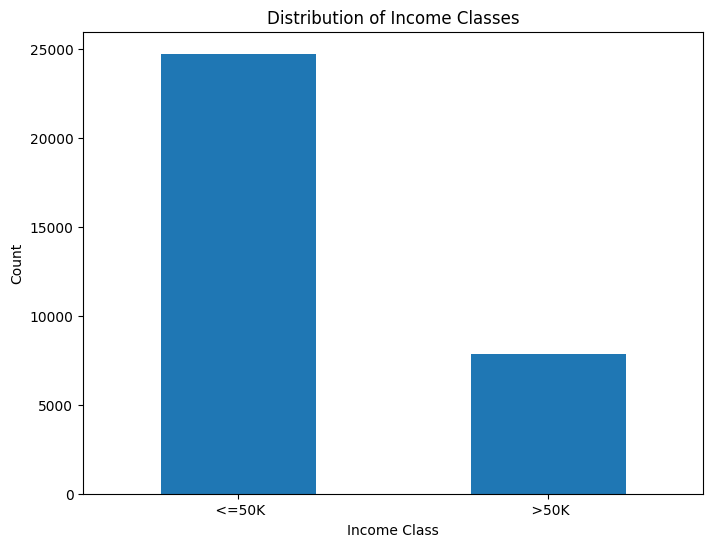

In [60]:
income_distribution = df['Income'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
income_distribution.plot(kind='bar')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.title('Distribution of Income Classes')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


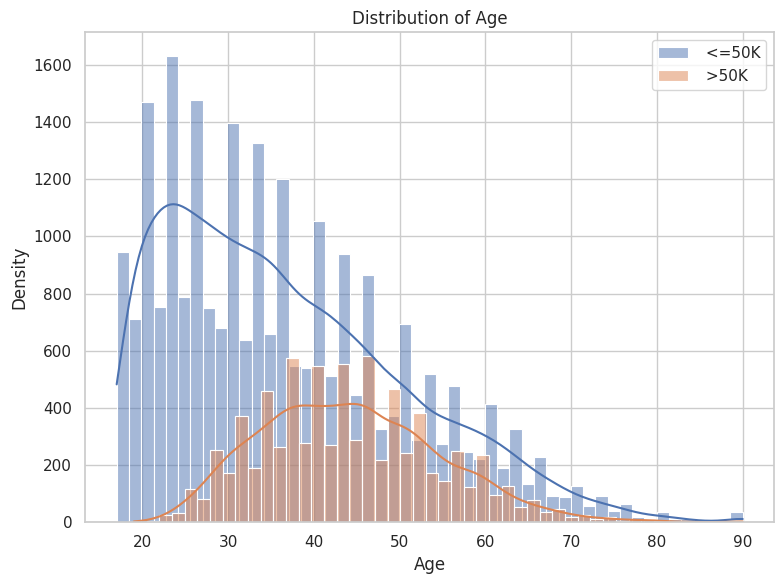

In [82]:
sns.set(style="whitegrid")

# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

# Iterate over numerical features and create distribution plots for each income class
numerical_features = ['Age']
for i, feature in enumerate(numerical_features):
    for income_class in df['Income'].unique():
        sns.histplot(df[df['Income'] == income_class][feature], kde=True, label=income_class, ax=axes)
    axes.set_title(f'Distribution of {feature}')
    axes.set_xlabel(feature)
    axes.set_ylabel('Density')
    axes.legend()

plt.tight_layout()
plt.show()

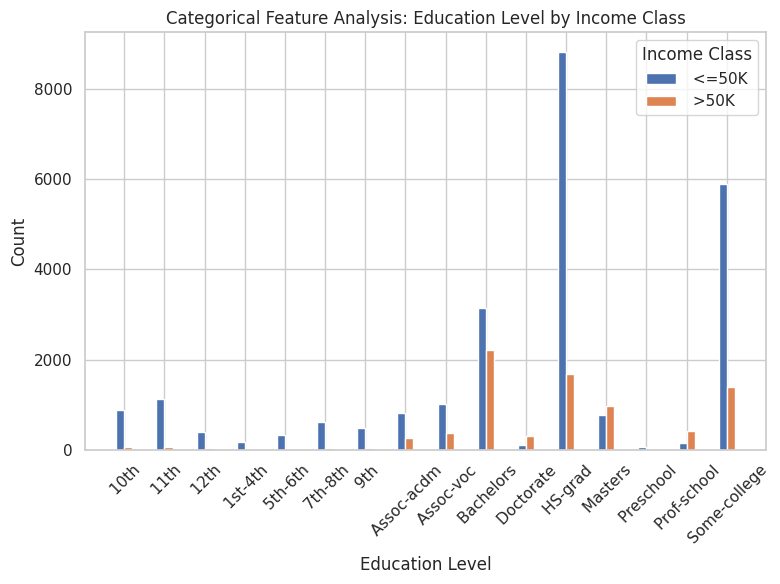

['',
 'import pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns',
 "df = pd.read_excel('adult.xlsx')",
 "df = pd.read_excel('adult.xlsx')",
 'print(df.columns)',
 'df.columns = [\n    "Age",\n    "Workclass",\n    "Fnlwgt",\n    "Education",\n    "Education-Num",\n    "Marital Status",\n    "Occupation",\n    "Relationship",\n    "Race",\n    "Sex",\n    "Capital Gain",\n    "Capital Loss",\n    "Hours-per-week",\n    "Native Country",\n    "Income"\n]\n\nprint(df.columns)',
 'print(df.shape)\ndf.head()',
 "df = pd.read_excel('adult.xlsx')",
 'print(df.shape)\ndf.head()',
 "df = pd.read_excel('adult.xlsx',header=None)",
 'print(df.shape)\ndf.head()',
 'df.columns = [\n    "Age",\n    "Workclass",\n    "Fnlwgt",\n    "Education",\n    "Education-Num",\n    "Marital Status",\n    "Occupation",\n    "Relationship",\n    "Race",\n    "Sex",\n    "Capital Gain",\n    "Capital Loss",\n    "Hours-per-week",\n    "Native Country",\n    "Income"\n]\n\nprin

In [83]:
grouped = df.groupby(['Income', 'Education']).size().unstack(fill_value=0)
categories = grouped.columns
income_classes = grouped.index

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2
x = np.arange(len(categories))

for i, income_class in enumerate(income_classes):
    ax.bar(x + i * width, grouped.loc[income_class], width, label=income_class)

ax.set_xlabel('Education Level')
ax.set_ylabel('Count')
ax.set_title('Categorical Feature Analysis: Education Level by Income Class')
ax.set_xticks(x + width * (len(income_classes) - 1) / 2)
ax.set_xticklabels(categories, rotation=45)
ax.legend(title='Income Class')

plt.tight_layout()
plt.show()
In

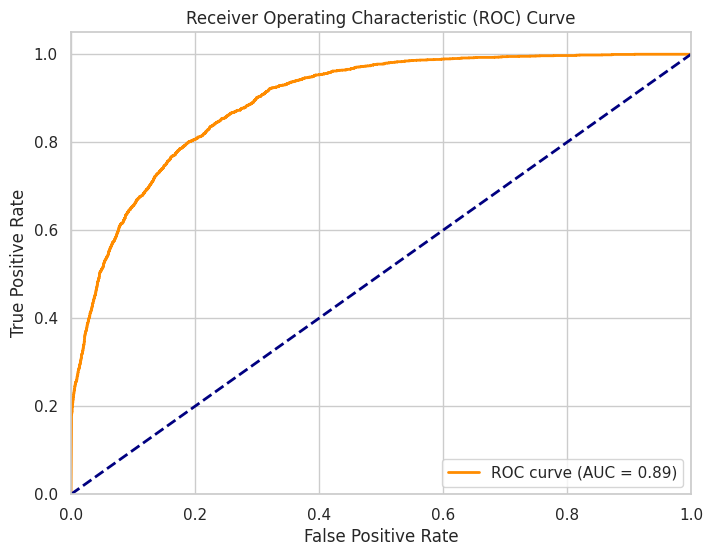

In [81]:
from sklearn.metrics import roc_curve, auc
y_prob = gnb.predict_proba(X_test)[:, 1]

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train_encoded)

# Predict probabilities for the positive class
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)


# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

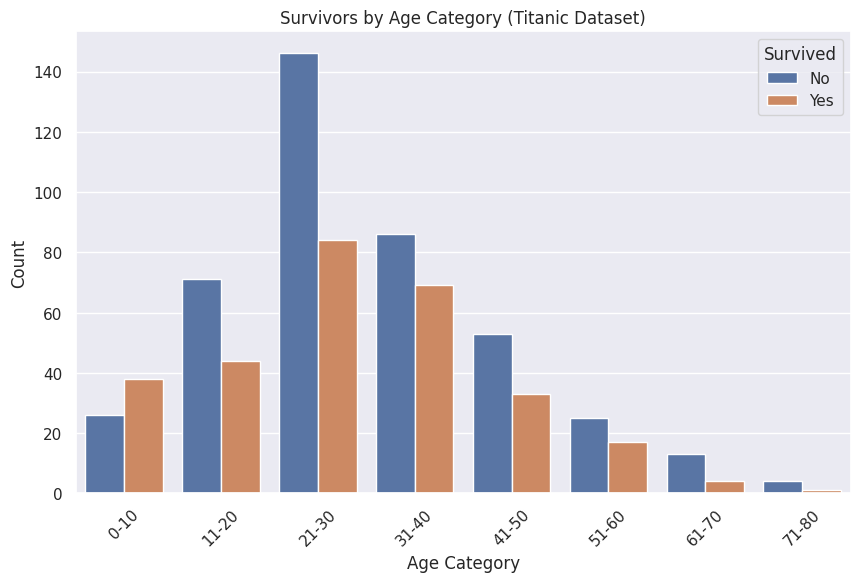

In [ ]:
# Define age categories
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column 'AgeCategory' based on the defined bins and labels
df['AgeCategory'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create a count plot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="AgeCategory", hue="Survived", data=df, order=age_labels)

# Customize the plot
plt.title("Survivors by Age Category (Titanic Dataset)")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])

# Show the plot
plt.xticks(rotation=45)
plt.show()


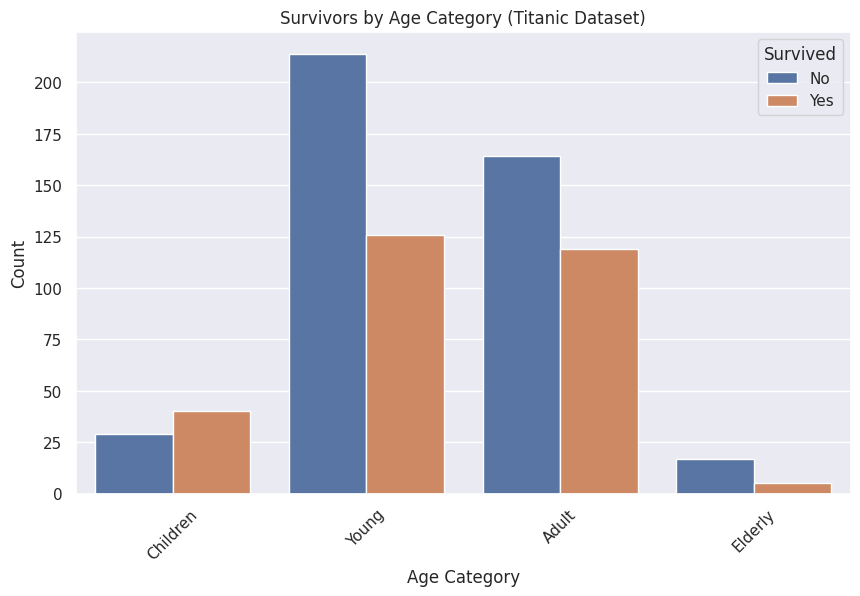

In [ ]:
age_bins = [0, 12, 30, 60, 100]
age_labels = ['Children', 'Young', 'Adult', 'Elderly']

# Create a new column 'AgeCategory' based on the defined bins and labels
df['AgeCategory'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create a count plot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="AgeCategory", hue="Survived", data=df, order=age_labels)

# Customize the plot
plt.title("Survivors by Age Category (Titanic Dataset)")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])

# Show the plot
plt.xticks(rotation=45)
plt.show()

we remove columns that won't be used, one-hot-encode the "Sex" and "Pclass" columns, and remove rows with missing values.

In [ ]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
df.head()


,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


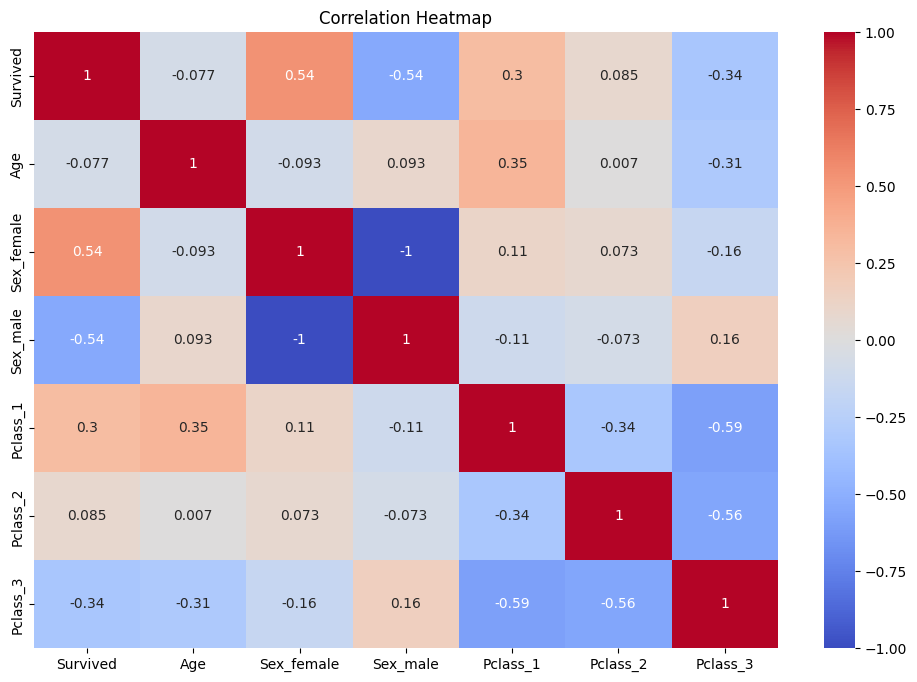

In [ ]:
correlation_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

model.score(x_test, y_test)


0.8321678321678322

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()


0.7857480547621394

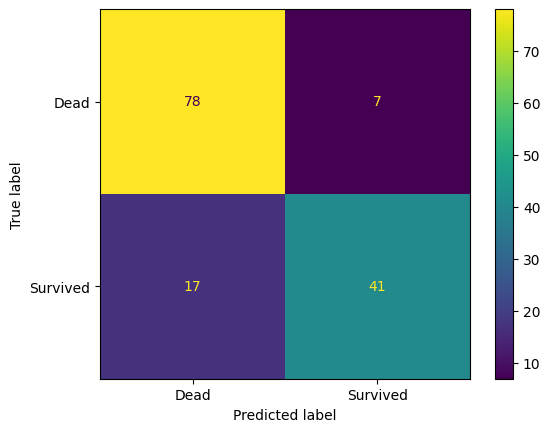

In [ ]:
%matplotlib inline

from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)


from sklearn.metrics import ConfusionMatrixDisplay


cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['Dead', 'Survived'])

cm_display.plot()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.82      0.92      0.87        85
           1       0.85      0.71      0.77        58

    accuracy                           0.83       143
   macro avg       0.84      0.81      0.82       143
weighted avg       0.83      0.83      0.83       143



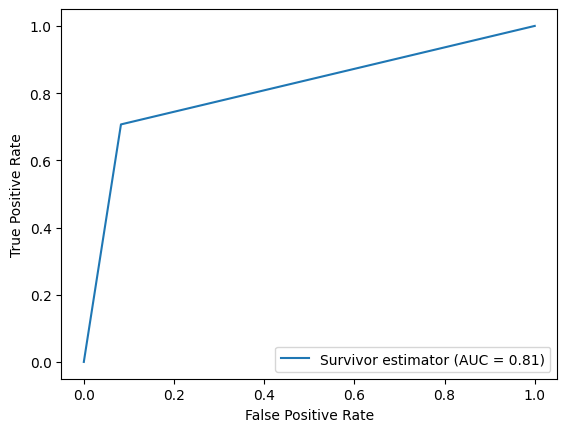

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Survivor estimator')
display.plot()
